In [75]:
import IPython
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [76]:
df = pd.read_csv(r'C:\Users\ziade\Downloads\titanic.csv')

In [77]:
print(df.head(4))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


In [78]:
print("*" * 100)
print(df.describe())
print("shape = {0}".format(df.shape))
# nulls in the data
print("*" * 100)
print('There are {0} nulls in Age and {1} in Cabins'.format(df['Age'].isna().sum(), df['Cabin'].isna().sum()))
# basic counts
print(df.count())
print("*" * 100)
# pCLASS
print("Death count = {0}".format(df['Survived'].value_counts()[0]))
print("1st class = {0}\n"
      "2ed class = {1}\n"
      "3ed class = {2}"
      "".format(df['Pclass'].value_counts()[1], df['Pclass'].value_counts()[2], df['Pclass'].value_counts()[3]))
# embarked
print("Southampton = {0}\n"
      "Cherbourg = {1}\n"
      "Queenstown = {2}"
      "".format(df['Embarked'].value_counts()["S"], df['Embarked'].value_counts()["C"], df['Embarked'].value_counts()["Q"]))
# Parch (number of parents / children aboard the Titanic)
# parch min max
print("Parch Max = {0}\n"
      "Parch Min = {1}"
      .format(df['Parch'].max(), df['Parch'].min()))
# parch %
for i in range(df['Parch'].max()):
    x = (df['Parch'].value_counts()[i] / 891) * 100
    print("parch = {0} = {1}%".format(i, x))
# sex
maleCount = df['Sex'].value_counts()['male']
print("males count = {0}\n"
      "female count = {1} ".format(maleCount, (891 - maleCount)))
# Age
print("Min Age = {0}\n"
      "Max Age= {1}".format(df['Age'].min(), df['Age'].max()))
childrenOnBored = len(df['Age'][df['Age'] <= 18])
adultsOnBored = len(df['Age'][df['Age'] > 18])
print("passanger under 18: {0}\n"
      "passanger over 18: {1}".format(childrenOnBored, adultsOnBored))

****************************************************************************************************
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.0

In [79]:
occur = df.groupby(['Sex']).Survived.mean
display(occur)

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000023052443670>>

In [80]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data.head(5))

             Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
PassengerId      0   0.0
Survived         0   0.0


In [81]:
new = df.groupby(['Sex', 'Survived'])['Survived'].count()
display(new)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [82]:
new = df.groupby(['Sex',])['Survived'].count()
display(new)

Sex
female    314
male      577
Name: Survived, dtype: int64

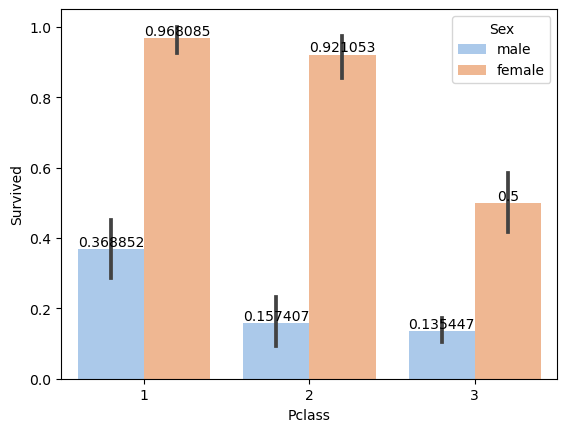

In [83]:
ax = sns.barplot(x='Pclass', y='Survived', data=df, palette = 'pastel', hue= 'Sex')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show(ax)

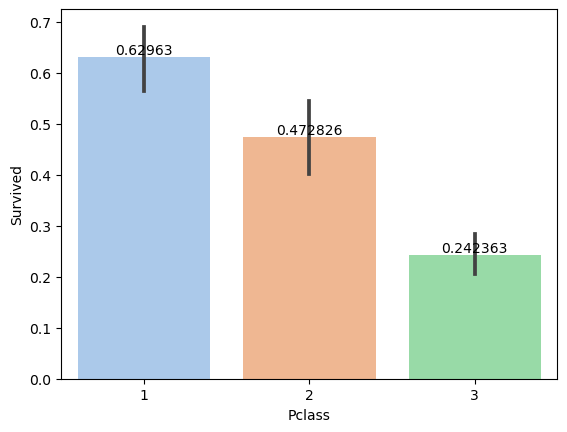

In [84]:
ax = sns.barplot(x='Pclass', y='Survived', data=df, palette = 'pastel', order=None, hue_order=None)
ax.bar_label(ax.containers[0])
plt.show(ax)
#(Donges, 2018)

In [85]:
new = df.groupby(['Pclass','Survived', 'Sex'])['Survived'] .count()

display(new)

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Survived, dtype: int64

In [86]:
new = df.groupby(['Pclass','Survived'])['Survived'] .count()

display(new)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

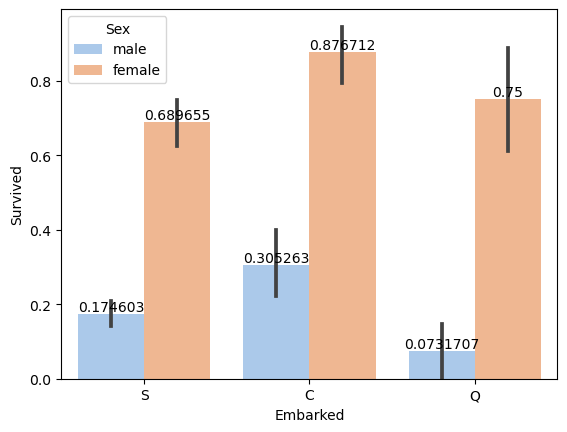

In [87]:
ax = sns.barplot(x='Embarked', y='Survived', data=df, palette = 'pastel', hue= 'Sex')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show(ax)

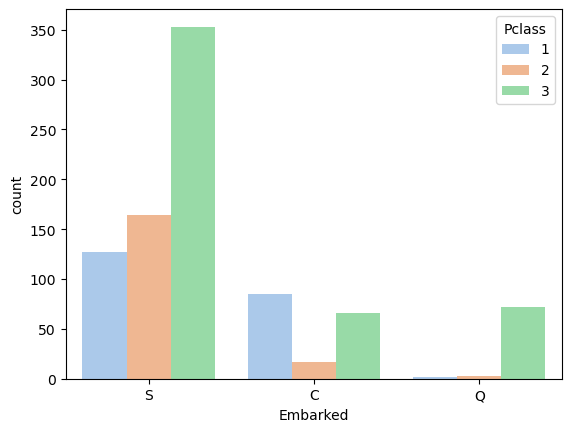

In [88]:
ax = sns.countplot(x='Embarked', hue='Pclass', data=df, palette = 'pastel')
plt.show(ax)

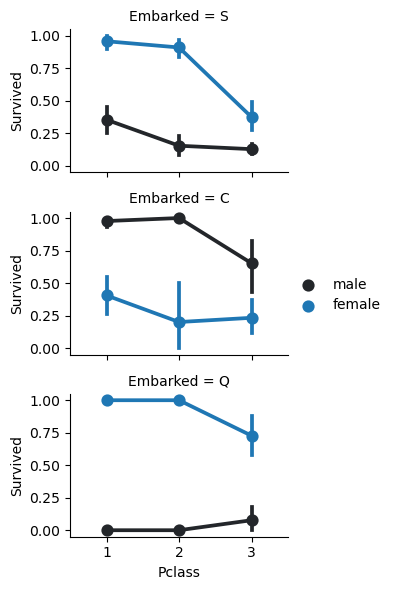

In [89]:
FacetGrid = sns.FacetGrid(df, row='Embarked', height=2, aspect=1.6, palette = 'pastel')
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()
plt.show(FacetGrid)
#(Donges, 2018)

In [90]:
new = df.groupby(['Embarked','Survived', ])['Survived'] .count()

display(new)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [91]:
new = df.groupby(['Embarked','Survived', 'Sex' ])['Survived'] .count()

display(new)

Embarked  Survived  Sex   
C         0         female      9
                    male       66
          1         female     64
                    male       29
Q         0         female      9
                    male       38
          1         female     27
                    male        3
S         0         female     63
                    male      364
          1         female    140
                    male       77
Name: Survived, dtype: int64

In [92]:
new = df.groupby(['Embarked', 'Sex'])['Sex'] .count()

display(new)

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Sex, dtype: int64

In [93]:
new = df.groupby(['Embarked', 'Pclass' ])['Survived'] .count()

display(new)

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Survived, dtype: int64

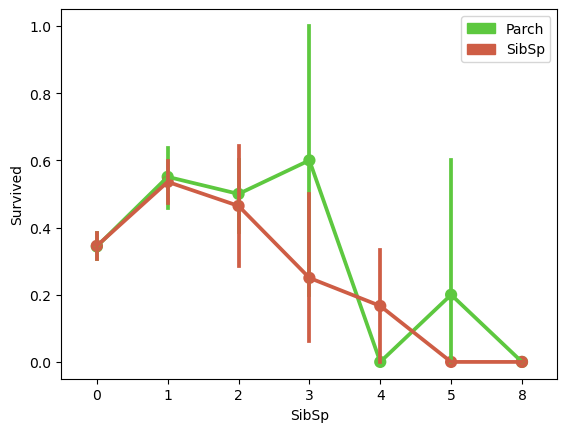

In [94]:
axes = sns.pointplot(x = 'Parch', y= 'Survived', data=df, errorbar= ('sd', 0.806057),color='#5DC83F')
axes = sns.pointplot(x = 'SibSp', y= 'Survived', data=df, color='#CE5D45', errorbar=('sd', 1.102743))
pop_a = mpatches.Patch(color='#5DC83F', label='Parch')
pop_b = mpatches.Patch(color='#CE5D45', label='SibSp')
plt.legend(handles=[pop_a,pop_b])

In [95]:
# SibSp %
for i in range(df['SibSp'].max()):
    x = (df['SibSp'].value_counts()[i] / 891) * 100
    print("parch = {0} = {1}%".format(i, x))    

parch = 0 = 68.23793490460157%
parch = 1 = 23.456790123456788%
parch = 2 = 3.1425364758698096%
parch = 3 = 1.7957351290684627%
parch = 4 = 2.0202020202020203%
parch = 5 = 0.5611672278338945%


KeyError: 6

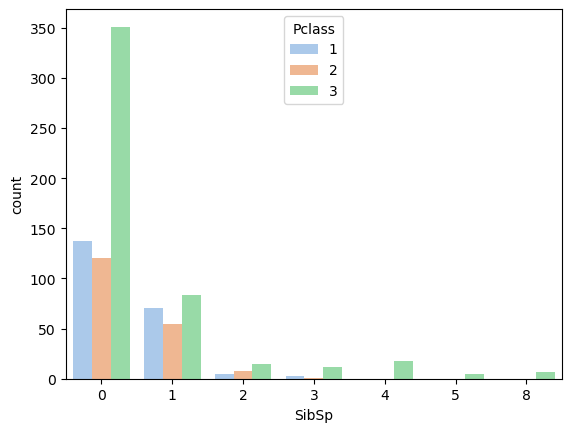

In [96]:
ax = sns.countplot(x='SibSp', hue='Pclass', data=df, palette = 'pastel')
plt.show(ax)

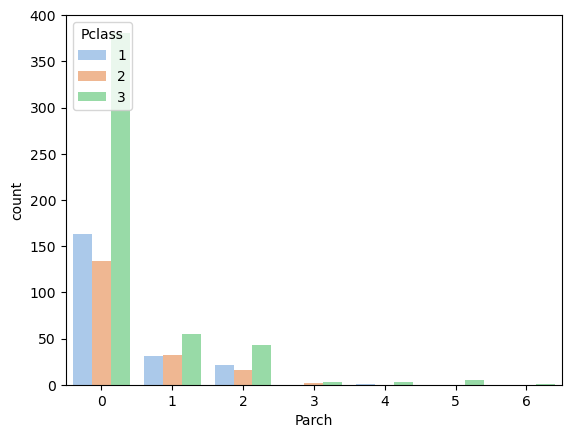

In [97]:
ax = sns.countplot(x='Parch', hue='Pclass', data=df, palette = 'pastel')
plt.show(ax)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500         0
1           1       1    1  38.0      1      0  71.2833         1
2           1       3    1  26.0      0      0   7.9250         0
3           1       1    1  35.0      1      0  53.1000         0
4           0       3    0  35.0      0      0   8.0500         0
..        ...     ...  ...   ...    ...    ...      ...       ...
885         0       3    1  39.0      0      5  29.1250         2
886         0       2    0  27.0      0      0  13.0000         0
887         1       1    1  19.0      0      0  30.0000         0
889         1       1    0  26.0      0      0  30.0000         1
890         0       3    0  32.0      0      0   7.7500         2

[712 rows x 8 columns]
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.404494    2

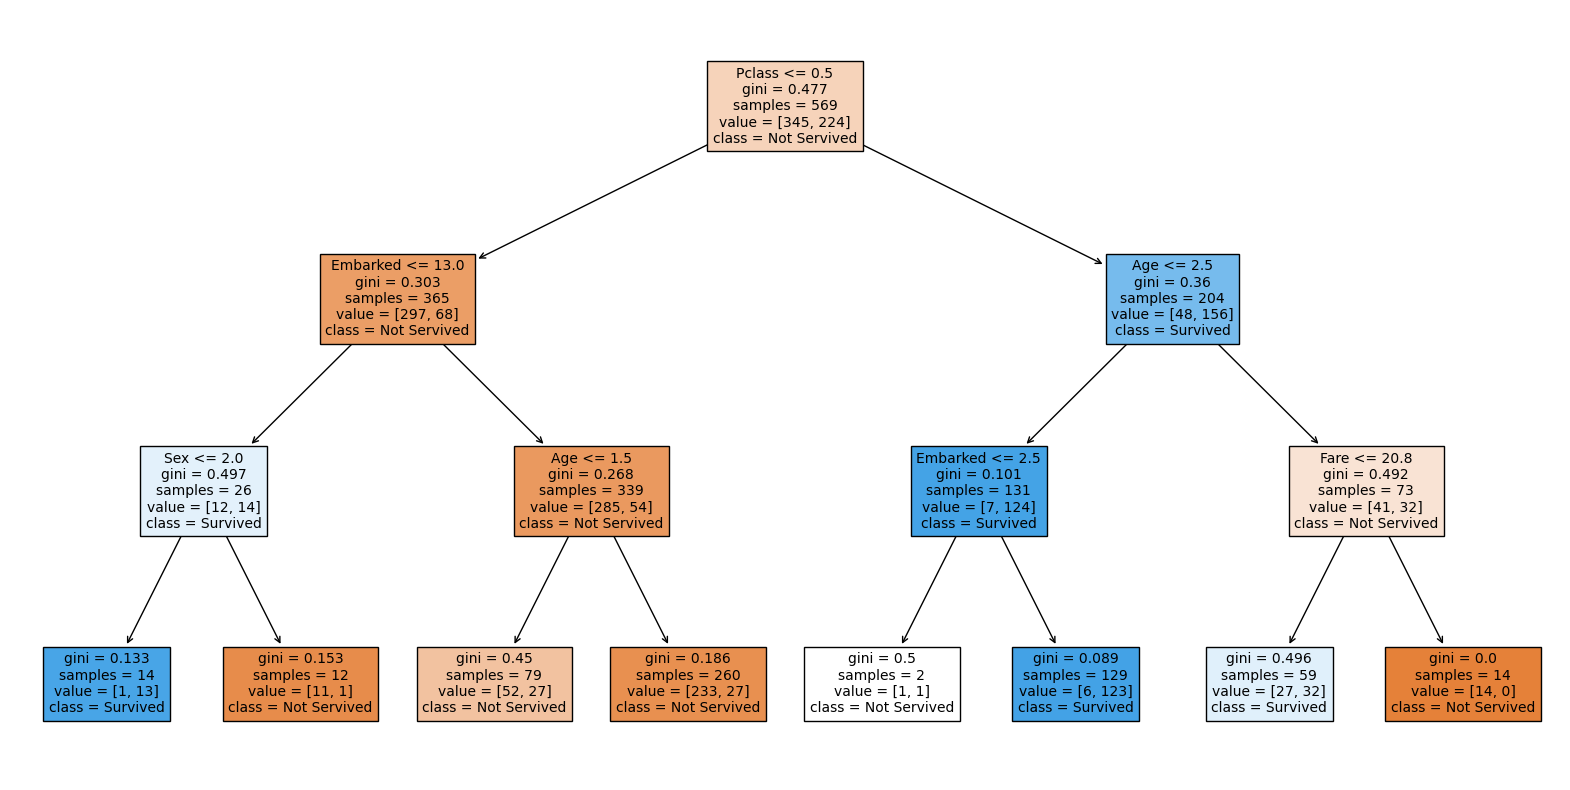

In [98]:
# creating a new df and removing all nulls and replacing values
df2 = df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1).copy()
df2 = df2.dropna()
df2['Sex'] = df2['Sex'].replace(['male', 'female'], [0, 1])
df2['Embarked'] = df2['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
#df2['Survived'] = df2['Survived'].replace([0,1], [False, True])

print(df2)

# info about the new dataframe
print(df2.describe())

#Split the data into a training set (80%) and test set (20%)
Y = df2['Survived']
X = df2.drop(['Survived'], axis=1)

#Split the data into a training set (80%) and test set (20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 65)


#Fit the training data and build a decision tree classifier
dt2=DecisionTreeClassifier(max_depth=3)
dt2_model =dt2.fit(x_train, y_train)

#Determine the accuracy of the predictions of the test set
y_pred = dt2.predict(x_test)
#Determine the accuracy of the predictions of the training set. Explain this outcome
y_pred = dt2.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# k f
kf=KFold(n_splits=5)
score=cross_val_score(dt2, X, Y, cv=kf)
print(score.mean())


# dispay
fig = plt.subplots(figsize=(20,10))
tree.plot_tree(dt2_model,fontsize=10, filled=True,feature_names =[ 'Age', 'Pclass', 'Embarked', 'Sex', 'Parch', 'Fare'], class_names= ['Not Servived', 'Survived']  )
plt.show(fig)


In [194]:
clf = KMeans(n_clusters=4,init ='k-means++')



In [195]:
predict = clf.fit_predict(X)


In [196]:
sse= []
for k in range(1,10):
    km= KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_)

print(sse)

C:\Users\ziade\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[2143910.6535541806, 912195.8680810519, 509886.7447070071, 315677.45093774516, 235412.58828916168, 164598.74161517175, 126594.32889267808, 110396.58533161494, 96313.97013866468]


Text(0, 0.5, 'Sum of Square Error')

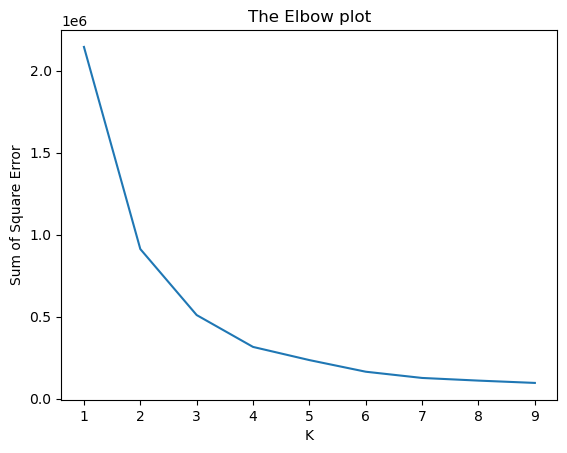

In [197]:
#hi = plt.scatter(df2, y= sse, x =k)
plt.plot(range(1,10),sse)
plt.title('The Elbow plot')
plt.xlabel("K")
plt.ylabel("Sum of Square Error")

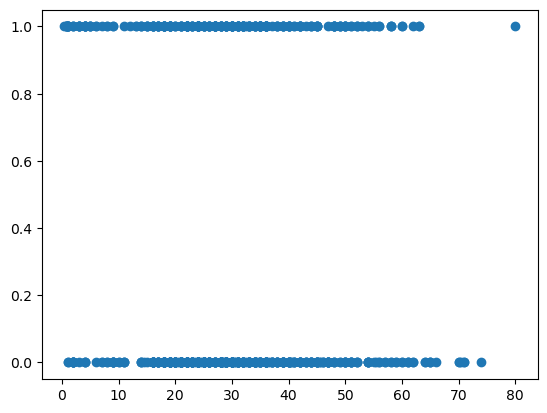

In [198]:
plt.scatter(df2['Age'],df2['Survived'])

In [199]:
df2.insert(0,'Cluster', predict )
df2.head()

ValueError: cannot insert Cluster, already exists

In [200]:
df3=df2[df2['Cluster']==1]
df4=df2[df2['Cluster']==2]
#df5=df2[df2['Cluster']==3]
#df6=df2[df2['Cluster']==4]

Text(0, 0.5, 'Survived = 1 ')

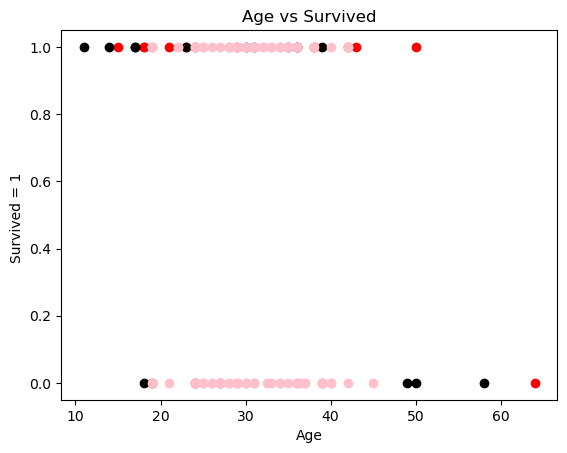

In [203]:
plt.scatter(df3['Age'],df3['Survived'], c='red')
plt.scatter(df4['Age'],df4['Survived'], c='black')
plt.scatter(df5['Age'],df5['Survived'], c='blue')
plt.scatter(df6['Age'],df6['Survived'], c='pink')
plt.title('Age vs Survived')
plt.xlabel("Age")
plt.ylabel("Survived = 1 ")

Text(0, 0.5, 'Survived = 1 ')

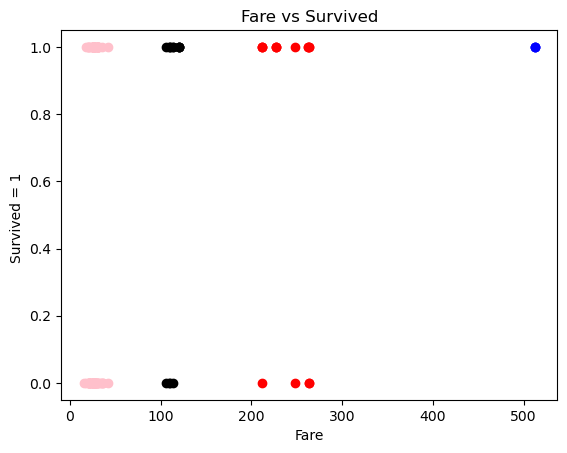

In [193]:
plt.scatter(df3['Fare'],df3['Survived'], c='red')
plt.scatter(df4['Fare'],df4['Survived'], c='black')
plt.scatter(df5['Fare'],df5['Survived'], c='blue')
plt.scatter(df6['Fare'],df6['Survived'], c='pink')
plt.title('Fare vs Survived')
plt.xlabel("Fare")
plt.ylabel("Survived = 1 ")

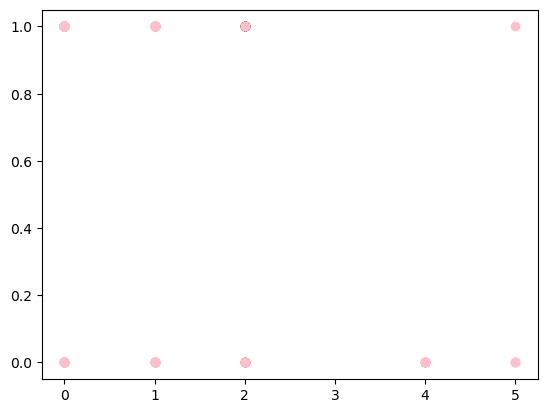

In [177]:
plt.scatter(df3['Parch'],df3['Survived'], c='red')
plt.scatter(df4['Parch'],df4['Survived'], c='black')
plt.scatter(df5['Parch'],df5['Survived'], c='blue')
plt.scatter(df6['Parch'],df6['Survived'], c='pink')

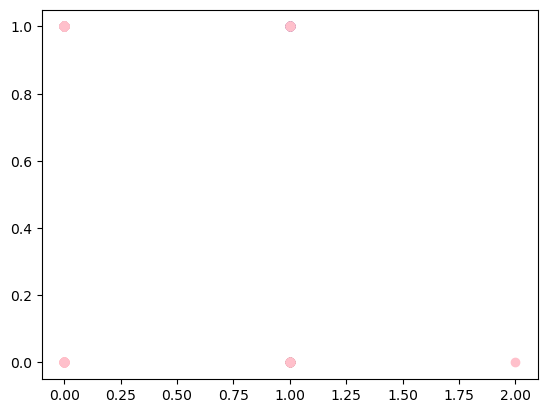

In [175]:
plt.scatter(df3['Embarked'],df3['Survived'], c='red')
plt.scatter(df4['Embarked'],df4['Survived'], c='black')
plt.scatter(df5['Embarked'],df5['Survived'], c='blue')
plt.scatter(df6['Embarked'],df6['Survived'], c='pink')